# Compare sorting list algorithms

In this notebook, we are going to compare the computation of the sorting algorithms:
* sorted (Internal python method on **List** object)
* insertion_sort
* merge_sort
* quick_sort
[Here](https://www.geeksforgeeks.org/time-complexities-of-all-sorting-algorithms/) you can find reference of there time complexity in the worse, average and best case senarios.

## Required modules and libries

In [31]:
# Algorithms of list sorting
from sorting_algorithms.insertion_sort import insertion_sort
from sorting_algorithms.merge_sort import merge_sort
from sorting_algorithms.quick_sort import *

# Module of time comparison
from compare_algos.collection_algos import CollectionAlgos
from inputs import InputList

## Build th object CollectionAlgos

Let's first try with the three algos:
* insrtion_sort
* merge_sort
* sorted

In [32]:
collection_sort_algos = CollectionAlgos(insertion_sort,
                                       merge_sort,
                                       sorted)

## Test same output

As a first step let's check that they all have the same output on a simple random input list

In [33]:
test_list = InputList(l_length=10)
print(test_list)

if collection_sort_algos.have_same_output(test_list):
    print('The three algos have the same output')
else:
    print("The three algos have different outputs")

[6926, 7231, 421, 5186, 5141, 7610, 3130, 1486, 8772, 2412]
The three algos have the same output


## Compare time

Let's compute the dataframe of comparison with the `harmonization` parameter chosen to be `False`

In [34]:
df_comparison = collection_sort_algos.calculate_time_multiple_lists(range_length=300, 
                                                                    harmonization=False)
df_comparison.head()

,insertion_sort,merge_sort,sorted
1,0.000002,7.152557e-07,0.000001
2,0.000002,2.861023e-06,0.000000
3,0.000003,4.053116e-06,0.000000
4,0.000005,5.245209e-06,0.000000
5,0.000004,5.960464e-06,0.000000


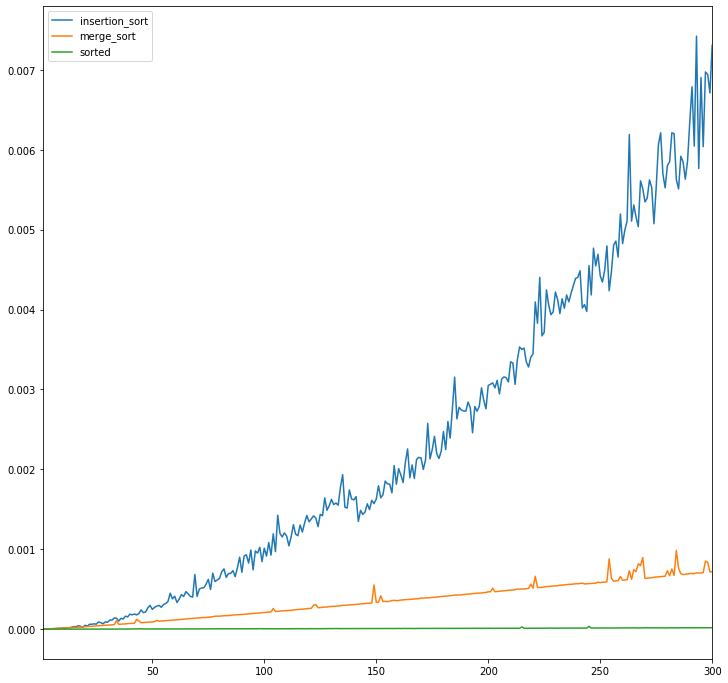

In [35]:
df_comparison.plot(figsize=(12, 12))

😯 We can see that the buit-in `sorted` out-perform both of the `insertion_sort` and `merge_sort` algorithms.

It is not surprising that `insertion_sort` is slower as it is suppoed to be in **O(n2)** in average compared to merge_sort which is in **O(nln(n))**. But it is interesting to see that the complex `sorted` algorithm is much better that the simple `merge` sort.

If you want to read more about how the `sorted` method is coded, go to this [link](https://github.com/python/cpython/blob/master/Objects/listsort.txt)

We can harmonize the results

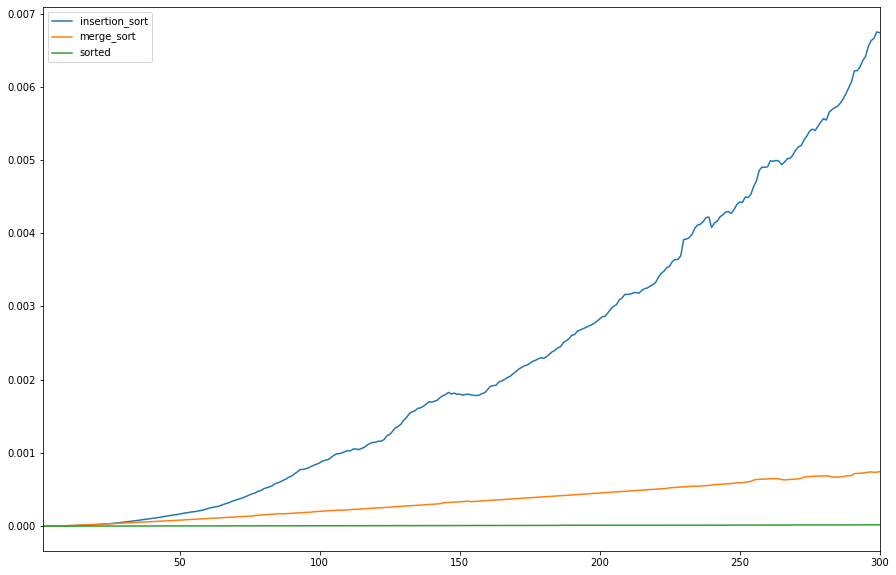

In [36]:
collection_sort_algos.calculate_time_multiple_lists(range_length=300, 
                                                    harmonization=True).plot(figsize=(15, 10))

## Different quick sort

If you take a look at the .py file:
```sorting_algorithms/quick_sort``` you will see that there are several algorithm of quick sorting.

### 1. Inplace vs. split lists

Back in the days I was in school, I learned a version of quick_sort, by splitting elements in a ***'left'*** list if smaller than the pivot and in a ***'right'*** list if bigger. This looked like a quick and easy way to implement the algorithm.

The counterpart is that it increases the space memory compared to an **inplace** strategy.

Let's checkout how it may impact the time of computation

In [37]:
from sorting_algorithms.quick_sort import quick_sort_inplace, quick_sort_michael

In [38]:
compare_quick_sort_inplace = CollectionAlgos(quick_sort_inplace, quick_sort_michael)

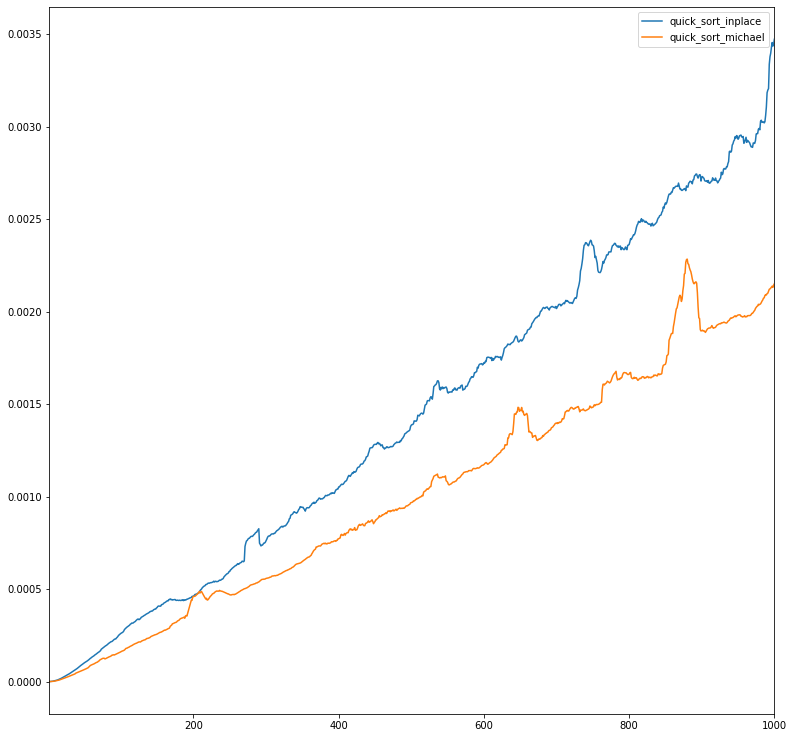

In [39]:
compare_quick_sort_inplace.calculate_time_multiple_lists(range_length=1000, 
                                                        harmonization=True, 
                                                         f_harmonization=20).plot(figsize=(13, 13))

It seems that the **inplace algorithm** is slower. It reduces the space complexity but I think that the call to a sub_function as well as the swap of elements at each comparison tend to incease the time of computation.

We can still see that both curves follow the same trend. They are both in **O(nln(n))**.

### 2. First element vs. random pivot

We can now compare the quick sort algorithm in its version with the first eleemtn as a pivot with its version with randomized pivot.

Taking a given element *(ex: the first one)* may lead to an unbalanced split of the list. This can give complexity of **O(n2)** in the worst case senario, namely if the list is reversly sorted.

Taking a randomized pivot at each iteration allows to obtain a complexity of **O(nln(n))** in average. the wonderful proof of this affiramation is in these videos:
* [part 1](https://www.youtube.com/watch?v=sToWtKSYlMw&list=PLXFMmlk03Dt7Q0xr1PIAriY5623cKiH7V&index=29)
* [part 2](https://www.youtube.com/watch?v=4t_Y-aGLkok&list=PLXFMmlk03Dt7Q0xr1PIAriY5623cKiH7V&index=30)
* [part 3](https://www.youtube.com/watch?v=IBTvneWhFsA&list=PLXFMmlk03Dt7Q0xr1PIAriY5623cKiH7V&index=31)




In [40]:
from sorting_algorithms.quick_sort import quick_sort_inplace
from sorting_algorithms.quick_sort import quick_sort_inplace_first_element

In [41]:
compare_pivot = CollectionAlgos(quick_sort_inplace, quick_sort_inplace_first_element)

Let's willingly keep the parameter `harmonized=False` so that we can spot the difference for certain lists of given length which may be close it their structure to that of the worst case

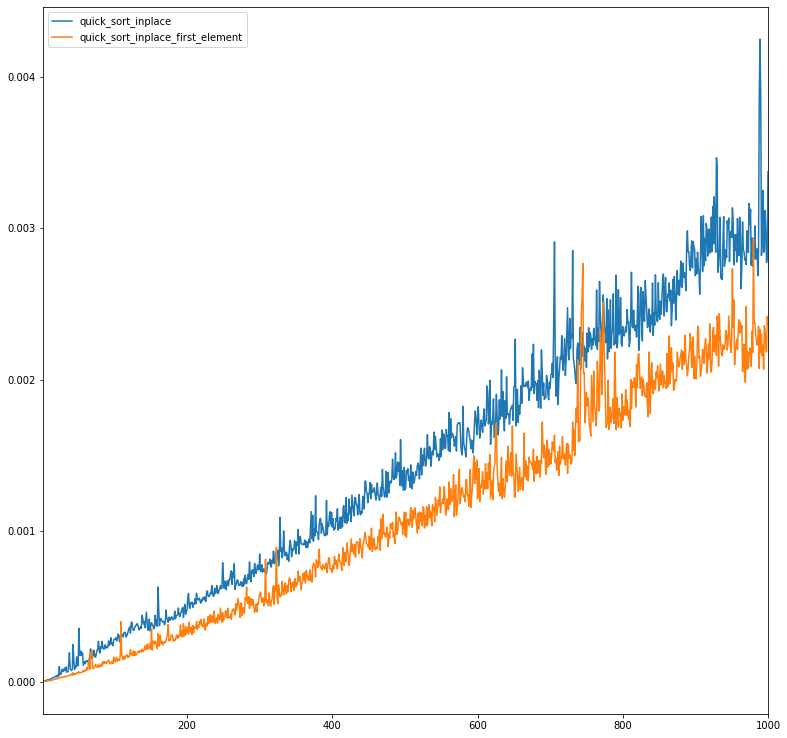

In [42]:
compare_pivot.calculate_time_multiple_lists(range_length=1000, 
                                            harmonization=False).plot(figsize=(13, 13))

😲 It is surprising to see that in a general case the algorithm `quick_sort_inplace` is less efficient than `quick_sort_inplace_first_element`. 
My asumption is that the worst case senario is rare to obatain. With a randomized list, most of the time the first element will be a good split.

However, if we encounter a bad split or a worst case senario, it can take foerever.
Let's highlight this difference, by setting the parameter `worst_case` to `True`...


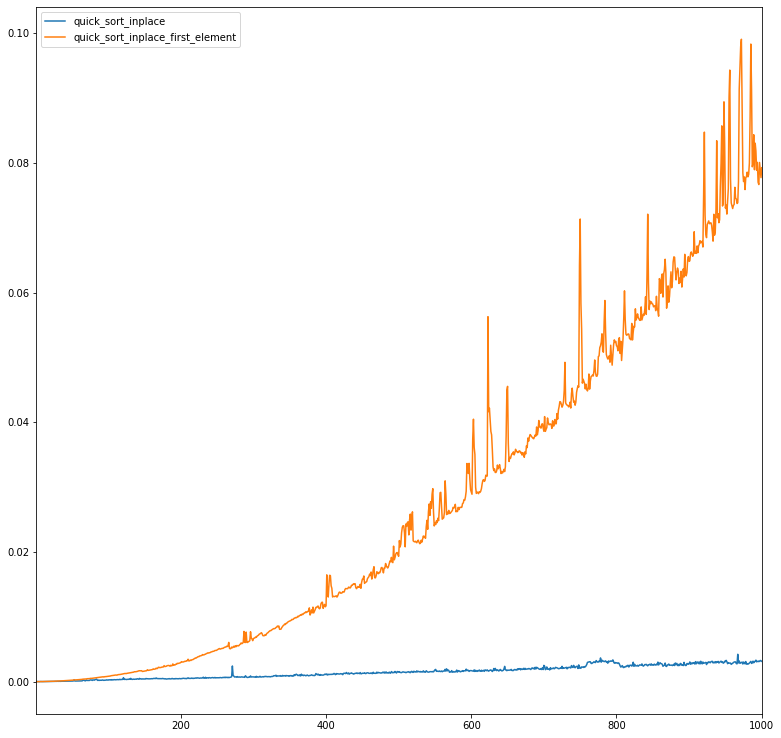

In [43]:
compare_pivot.calculate_time_multiple_lists(range_length=1000, 
                                            harmonization=False, 
                                           worst_case=True).plot(figsize=(13, 13))

We can this in this case that the trend of the `quick_sort_inplcase_fisrt_element` follows a **O(n2)** pattern.

## Compare `merge_sort` and `quick_sort`

Both of these algorithms are supposed to be in **O(nln(n))** in the average case. It may be interesting to compare them.

Let's pick up the best of quick_sort algorithm to compare it to merge sort

In [44]:
compare_merge_quick = CollectionAlgos(quick_sort_michael_first_element, merge_sort)

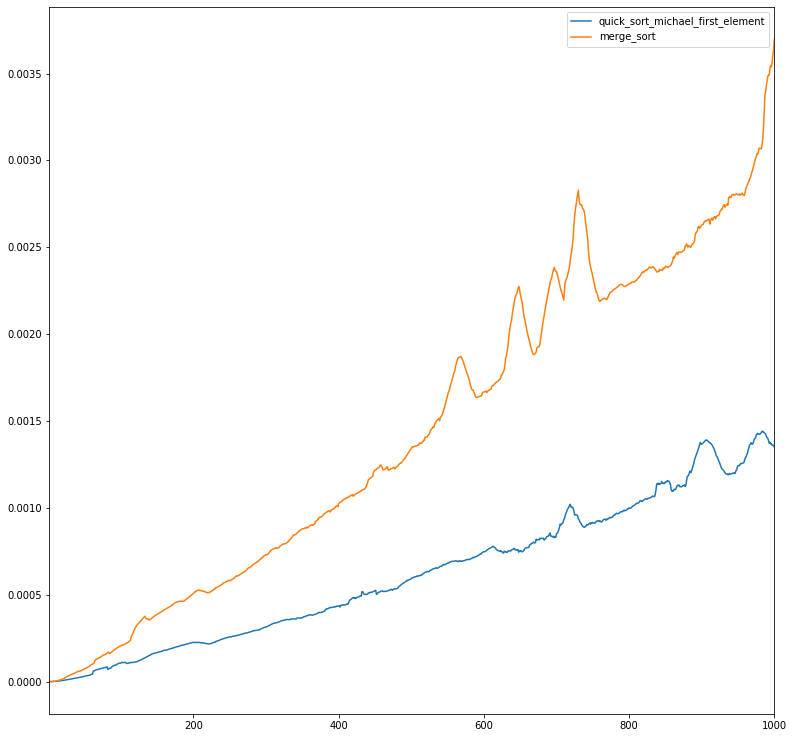

In [45]:
compare_merge_quick.calculate_time_multiple_lists(range_length=1000, 
                                            harmonization=True, 
                                             f_harmonization=20).plot(figsize=(13, 13))

**QUICK SORT** is our winner <br>
However, I have used the first_element_strategy. You may encounter a bad case and it may slow down drastically.

Let's see if the randomized strategy holds up with merge sort

In [46]:
compare_merge_quick_randomized = CollectionAlgos(quick_sort_michael, merge_sort)

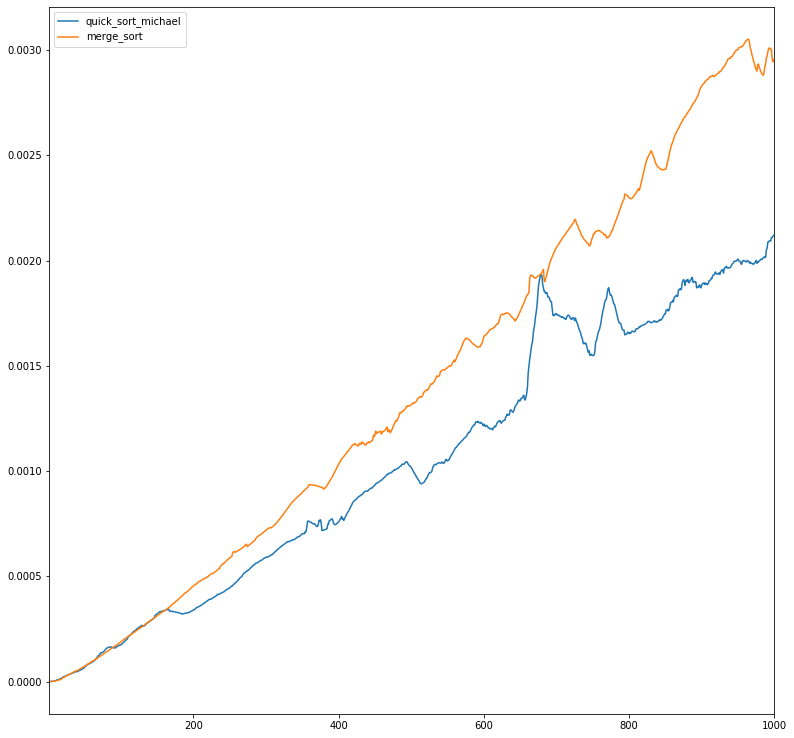

In [47]:
compare_merge_quick_randomized.calculate_time_multiple_lists(range_length=1000, 
                                            harmonization=True, 
                                             f_harmonization=20).plot(figsize=(13, 13))

It does! <br>
This version is safer but a bit slower...